<h1><center>Avocado Prices</center><h1>   
<h5><center>Historical data on avocado prices and sales volume in multiple US markets</center><h5>   

---
  
<center><img src='https://cdn.pixabay.com/photo/2017/03/04/12/10/avocado-2115922_960_720.jpg'></center>

<a id="top"></a>
 <font size='5' color='blue'><h2>Contenidos</h2></font> 

---

1. [About Dataset](#1)  
    1.1.[Context](#1_1)    
    1.2.[Content](#1_2)  
    1.3.[relevant columns](#1_3)  
    1.4.[Acknowledgements](#1_4)  
    1.5.[Inspiration](#1_5)  

<div style = "float: left; width: 80%;" >
        <font id = '1' size = '3' color = 'blue'> <h2> 1.- Introduccion 🃏 </h2> </font>
        </div>
    <div style="float: right;">
        <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Go to Top</a>
    </div>
    <br style="clear: left;" />
    <a id='import'></a>

---

###### **Everything** in this part 1 is what can be found on the kaggle site where this data comes from. 
[Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

---  


###  1.1- <a id='1_1'> Context 🧐 </a> 
---
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements. Clearly, they aren't buying home because they are buying too much Avocado Toast! But maybe there's hope… if a Millenial could find a city with cheap avocados they could live out the Millenial American Dream.

###  1.2.- <a id='1_2'>Content 🔨</a> 
---

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:  

> ``The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.``  

###  1.3.- <a id='1_3'>relevant columns </a> 
---

* **``Date``** - The date of the observation  
* **``AveragePrice``** - the average price of a single avocado  
* **``type``** - conventional or organic  
* **``year``** - the year    
* **``Region``** - the city or region of the observation  
* **``Total Volume``** - Total number of avocados sold  
* **``4046``** - Total number of avocados with PLU 4046 sold  
* **``4225``** - Total number of avocados with PLU 4225 sold  
* **``4770``** - Total number of avocados with PLU 4770 sold  



###  1.4.- <a id='1_4'>Acknowledgements </a> 
---

Many thanks to the Hass Avocado Board for sharing this data!!  

[http://www.hassavocadoboard.com/retail/volume-and-price-data](http://www.hassavocadoboard.com/retail/volume-and-price-data)

<div style = "float: left; width: 80%;" >
        <font id = '2' size = '3' color = 'blue'> <h2> 2.- Que vamos a hacer  🤓 </h2> </font>
        </div>
    <div style="float: right;">
        <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Go to Top</a>
    </div>
    <br style="clear: left;" />
    <a id='import'></a>

---

Se va a analisar los datos, con una analisis exploratorio de datos, para ver que podemos sacar de ellos, se va a ver que tipo de datos tenemos, si hay datos nulos, si hay datos duplicados, si hay datos atipicos, y se va a ver que tipo de relaciones hay entre las variables, para ver que conclusiones podemos sacar de ellos.

<div style = "float: left; width: 80%;" >
        <font id = '3' size = '3' color = 'blue'> <h2> 3.- Importar librerias 📚 </h2> </font>
        </div>
    <div style="float: right;">
        <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Go to Top</a>
    </div>
    <br style="clear: left;" />
    <a id='import'></a>

---


---

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
 # sm.tsa.seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# sm
import statsmodels.api as sm
# smt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
# test stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
        
        #Determing rolling statistics
        rolmean = timeseries.rolling(window=12).mean()
        rolstd = timeseries.rolling(window=12).std()
    
        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Perform Dickey-Fuller test:
        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

<div style = "float: left; width: 80%;" >
        <font id = '4' size = '3' color = 'blue'> <h2> 4.-  Datos 🗄️  </h2> </font>
        </div>
    <div style="float: right;">
        <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Top">Go to Top</a>
    </div>
    <br style="clear: left;" />
    <a id='import'></a>

---


In [4]:
path_data = "./data/avocado.csv"

df = pd.read_csv(path_data)

In [5]:
# I discard the first column because we don't know what it is, it could be some kind of id,
# but the numbers repeat, and there is no column name to tell us what it could be. 
df = df.drop('Unnamed: 0',axis = 1) 

In [6]:
# a mi me gusta imprimir el head para ver como quedo el dataframe, que columnas tiene, mas o menos los tipos de datos, y si es que puede tener un orden
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# de la misma forma, me gusta imprimir el tail para ver que no haya datos raros o que no se hayan cargado bien, o que no se hayan cargado todos los datos
# o que no haya datos que no correspondan a lo que deberian ser, y ver si tienen un orden logico
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
# para ver el tamaño del dataframe, cuantas filas y columnas tiene
df.shape

(18249, 13)

In [9]:
# me da informacion sobre el dataframe, como el tipo de datos que tiene cada columna, si tiene datos nulos, y cuantos, y el tamaño de memoria que ocupa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
# para ver los valores unicos que tiene cada columna
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

De esto podemos denotar que tenemos 3 variables de tipo object, esto devemos tenerlo en cuanto para hacer el analisis, ya que no podemos hacer analisis con variables de tipo object, por lo que tendremos que convertirlos a variables numericas, para poder hacer el analisis.  
y tambien en este caso Date es una variable de tipo object, pero en este caso si podemos hacer analisis con ella, ya que es una variable de tipo fecha, y podemos sacar conclusiones de ella, solo que tendremos que convertirla a tipo fecha.

In [11]:
# el paso enterior ya me dice si tiene nulls, pero si quiero ver cuantos, puedo usar el siguiente comando
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
# repetidos 
df.duplicated().sum()

0

In [13]:
# de.describe() me da informacion estadistica de las columnas numericas, como la media, la desviacion estandar, el minimo, el maximo, y los cuartiles
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Evaluar la importancia de las variables categóricas 

In [14]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
len(df['type'].unique())

2

la columna type solo tiene 2 valores, conventional y organic, puede que nos aporte valor

In [16]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
len(df['region'].unique())

54

Contamos con 54 regiones diferentes descritas en la columna region, al ser una region claramente limitada

In [18]:
#este paso deberia de ser innecesario, pero por si acaso, lo hago
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [19]:
len(df['Date'].unique())

169

Esta es una columna curiosa, dado que tenemos 18249 registros, en un primer lugar podria pensarce que la variable date desbribe cada dia, pero al ver los valores unicos, vemos que tenemos 169 valores unicos, lo que nos indica que tenemos datos de cada semana, por lo que podemos sacar conclusiones de cada semana, y no de cada dia.

### Conlusiones 

* Tenemos 18249 registros, y 14 columnas    
* Tenemos 3 variables de tipo object, una la cual se va a cambiar a tipo date   
* Tenemos 54 regiones diferentes    
* Tenemos 169 valores unicos en la columna date, lo que nos indica que tenemos datos de cada semana, por lo que podemos sacar conclusiones de cada semana, y no de cada dia y que hay registros que se acomulan en una semana.
* No tenemos datos nulos, ni duplicados
    

# preprocesado de datos

..2 Changing data types

In [20]:
# cambiar a tipo de dato datetime a la columna Date
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
from scipy import stats


In [22]:


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
numerical_features.remove('Date')
numerical_features.remove('AveragePrice')
numerical_features.remove('region')

c:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

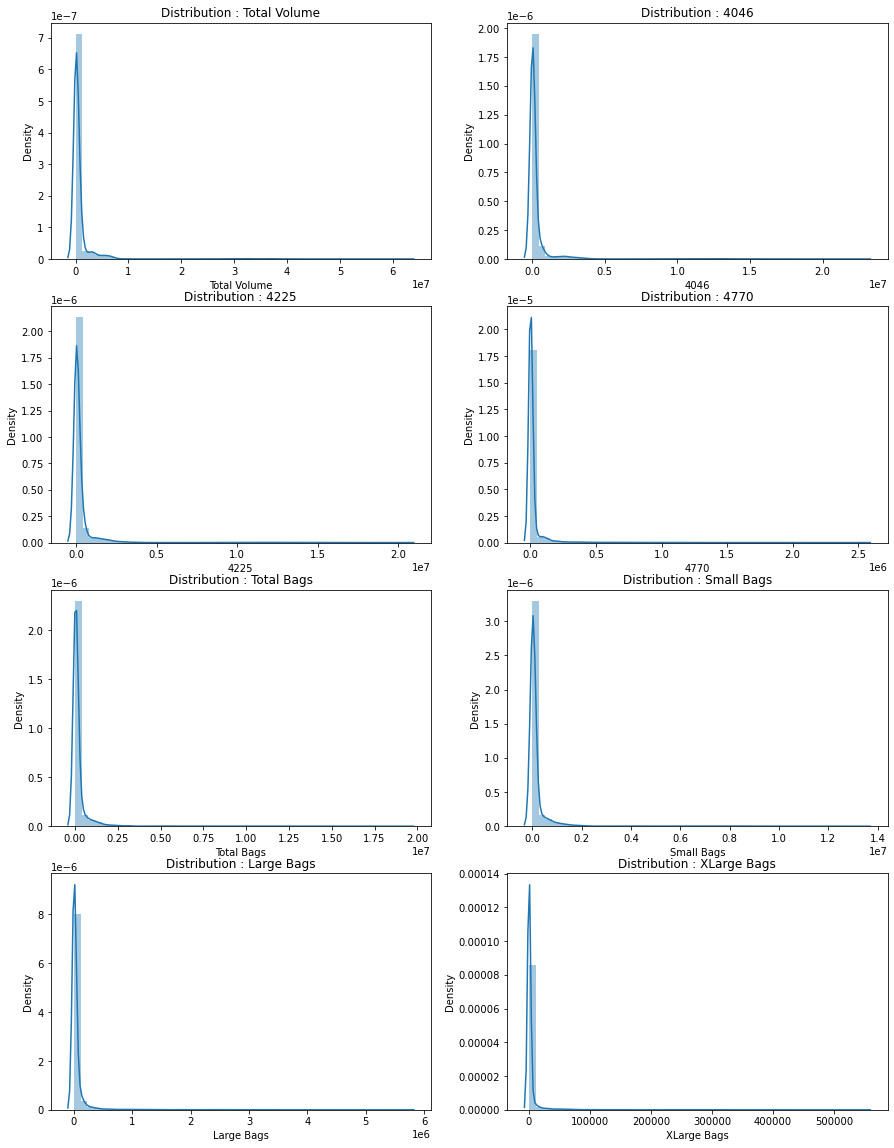

In [23]:
# plot histogram with the distribution of all numerical data using sns


fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
fig.tight_layout(h_pad = 10,w_pad = 5)



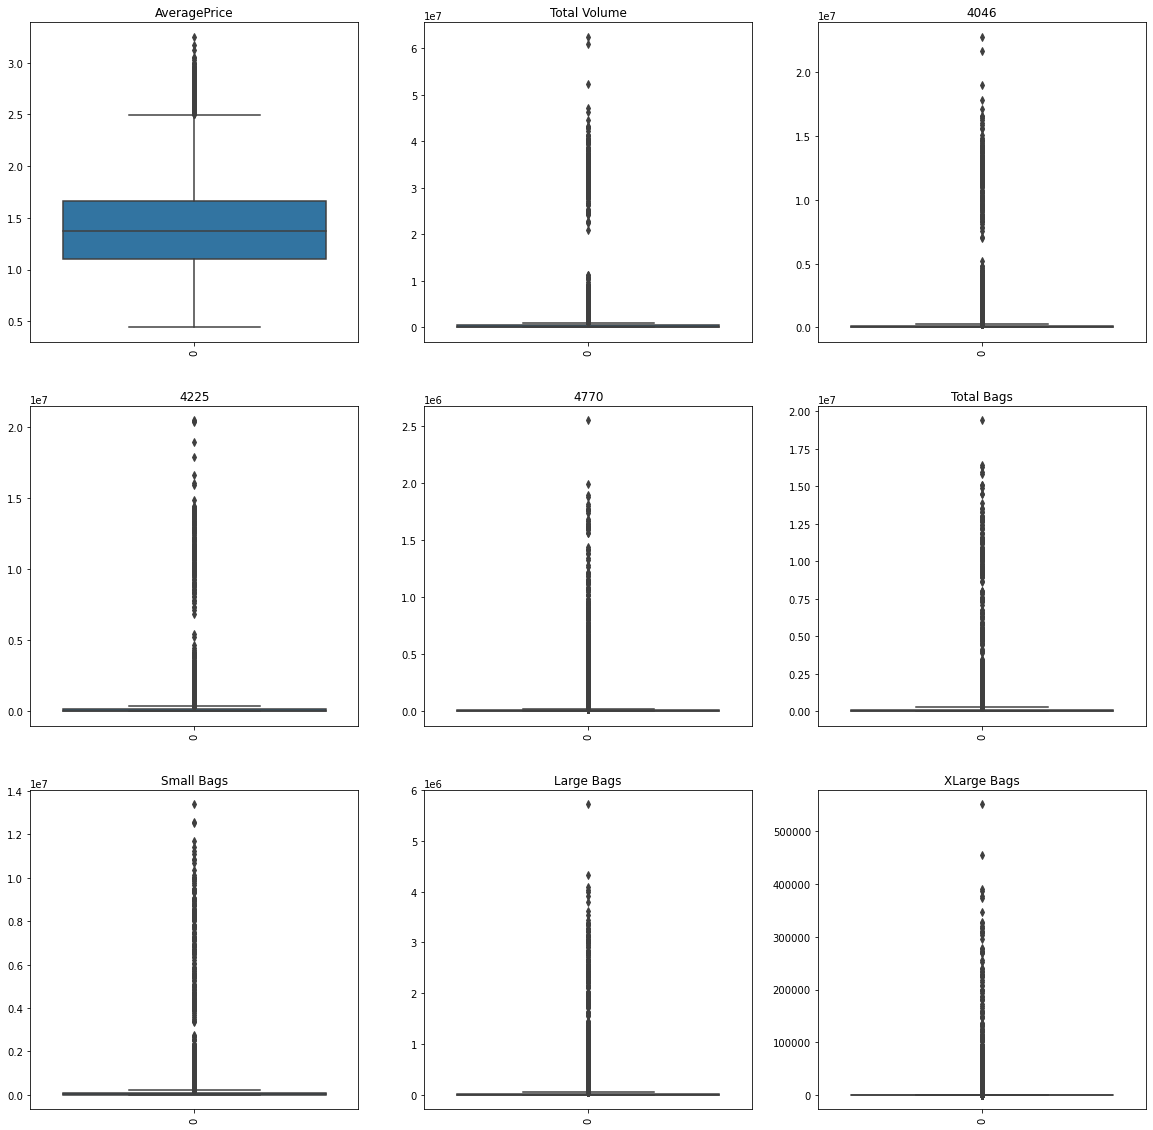

In [24]:
# boxplot para todas las columnas numericas usando seaborn con 3 columnas 
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for variable, subplot in zip(df.select_dtypes(include=['float64','int64']).columns, ax.flatten()):
    data = df[variable]
    sns.boxplot(data=data, ax=subplot)
    subplot.set_title(variable)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

conclusiones
tenemos una asimetria a la isquierda en todas las variables, no es una distribucion normal.
y tenemos una gran cantidad de outliers en todas las variables, por lo que tendremos que tratarlos para aplicar algun metodo de ml, el tretamiento se hara en un paso futuro

In [25]:
# para ver los tipos de datos que tiene cada columna
df.dtypes
    

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [26]:
AnalisisEstadisticoPromedioXtype=df.groupby('type').mean()

In [27]:
AnalisisEstadisticoPromedioXtype

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [28]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.figure_factory as ff

In [29]:
col="type"
AnalisisFrecuenciaXtype=df[col].value_counts().reset_index()
AnalisisFrecuenciaXtype=AnalisisFrecuenciaXtype.rename(columns={col:"count","index":col})
trace=go.Pie(labels=AnalisisFrecuenciaXtype[col],values=AnalisisFrecuenciaXtype['count'],pull=[0.05,0])
layout={'title':'Género(conventional, organic)'}
fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

In [30]:
x=df.copy( )

In [31]:
df_conventional=x[x['type']=='conventional']
df_organic=x[x['type']=='organic']

In [156]:
df_conventional_w = df_conventional.copy(deep = True)
df_conventional_w.set_index('Date',inplace = True)
df_conventional_w = df_conventional_w.resample('W').mean()
temp_conventional = df_conventional_w['AveragePrice'].copy(deep = True)
df_conventional_w.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.009630,1.538052e+06,601242.840926,671762.802778,41977.973333,223068.224815,178194.034259,43937.957407,936.233148,2015
2015-01-11,1.111296,1.421895e+06,561008.763704,594701.351667,43309.042037,222875.642407,186732.530000,35341.695000,801.417407,2015
2015-01-18,1.133519,1.416863e+06,576453.735741,570980.695185,40690.031296,228738.393148,190612.723333,37730.401296,395.268519,2015
2015-01-25,1.115370,1.389043e+06,588022.877407,525403.672222,38245.927407,237370.033333,196953.430741,39981.156296,435.446296,2015
2015-02-01,0.962037,2.175782e+06,916394.015556,926056.700000,67990.370926,265340.896667,208198.950185,54814.104630,2327.841852,2015


In [104]:
df_organic_w = df.copy(deep = True)
df_organic_w.set_index('Date',inplace = True)
df_organic_w = df_organic_w.resample('W').mean()
temp_organic = df_organic_w.copy(deep = True)
df_organic_w.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015
2015-01-11,1.370648,7.273686e+05,287260.786944,303781.757778,21751.550463,114574.490370,95860.522407,18313.259259,400.708704,2015
2015-01-18,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015
2015-01-25,1.397130,7.080211e+05,299121.600648,267862.244167,19244.248704,121793.027500,100715.897685,20859.406667,217.723148,2015
2015-02-01,1.247037,1.106048e+06,465675.823704,469409.541481,34143.419537,136819.689815,107192.904167,28462.864722,1163.920926,2015


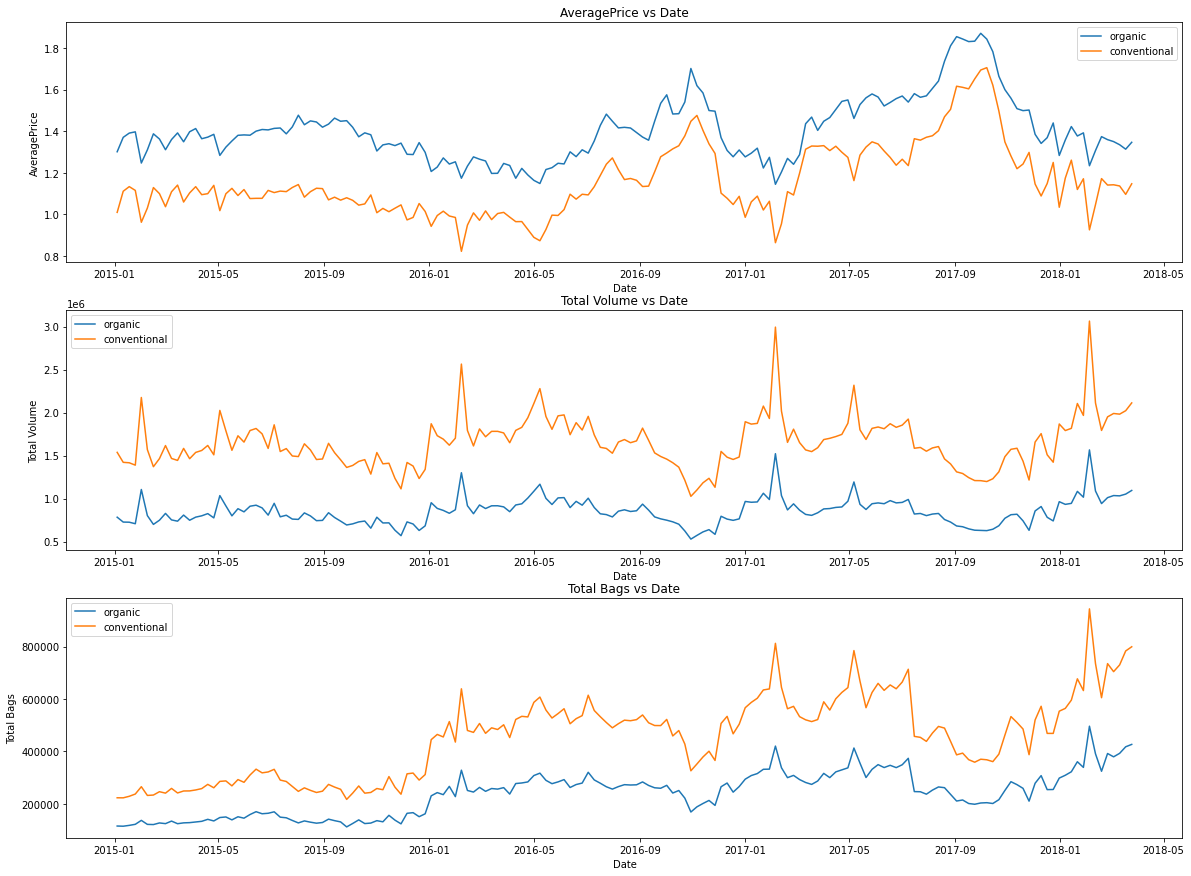

In [34]:
l1 = ['AveragePrice','Total Volume','Total Bags']
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (20,15))
for i in range(len(l1)):
    
    plt.subplot(3,1,i+1)
    sns.lineplot(x = df_organic_w.index,y = l1[i],data = df_organic_w)
    sns.lineplot(x = df_conventional_w.index,y = l1[i],data = df_conventional_w)
    plt.legend(['organic','conventional'])  
    title = l1[i] + ' vs Date'
    plt.title(title);
    

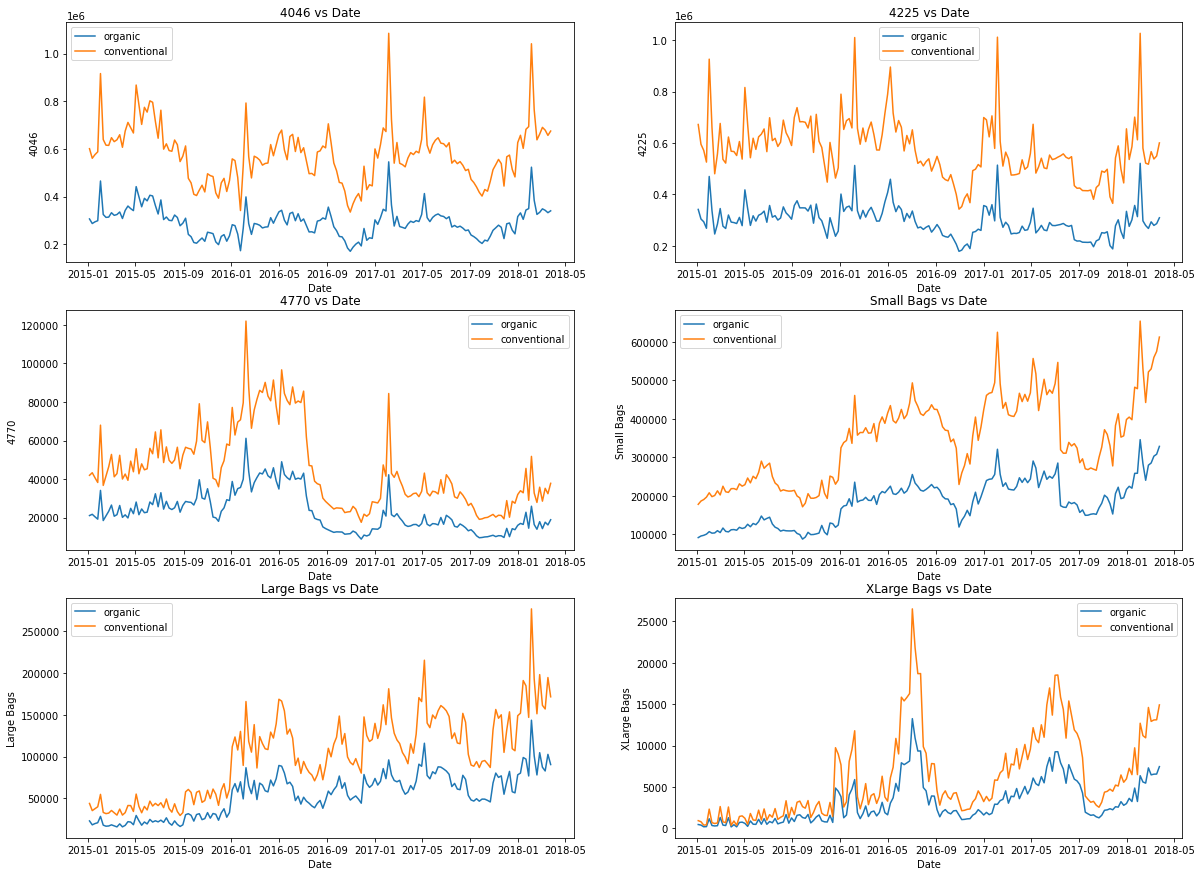

In [35]:
l2 = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,15))
for i in range(len(l2)):
    
    plt.subplot(3,2,i+1)
    sns.lineplot(x = df_organic_w.index,y = l2[i],data = df_organic_w)
    sns.lineplot(x = df_conventional_w.index,y = l2[i],data = df_conventional_w)
    plt.legend(['organic','conventional'])  

    title = l2[i] + ' vs Date'
    plt.title(title);

In [36]:
total_volume = [sum(df[df['type'] == 'conventional']['Total Volume']) / sum(df['Total Volume']) * 100,
                sum(df[df['type'] == 'organic']['Total Volume']) / sum(df['Total Volume']) * 100]

In [37]:
# plot the pie chart for total volume
fig = go.Figure(data=[go.Pie(labels=['conventional','organic'],
                             values=total_volume)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['rgb(255, 127, 14)','rgb(44, 160, 101)'], line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Total Volume')

fig.show()

In [38]:
Total_bags = [sum(df[df['type'] == 'conventional']['Total Bags']) / sum(df['Total Bags']) * 100,
                sum(df[df['type'] == 'organic']['Total Bags']) / sum(df['Total Bags']) * 100]

In [39]:
# plot the pie chart for total volume
fig = go.Figure(data=[go.Pie(labels=['conventional','organic'],
                             values=Total_bags)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['rgb(255, 127, 14)','rgb(44, 160, 101)'], line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Total bags')

fig.show()

<AxesSubplot:xlabel='year'>

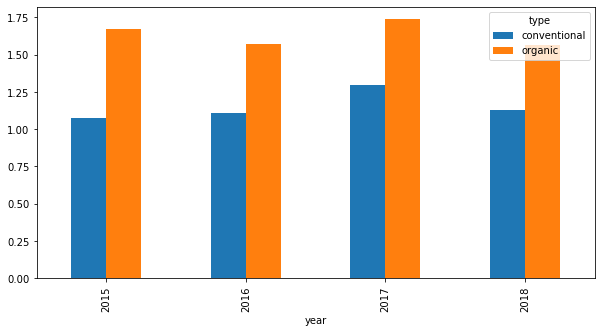

In [40]:
# precio promedio por año y tipo de aguacate
df.groupby(['year','type'])['AveragePrice'].mean().unstack().plot(kind='bar',figsize=(10,5))

In [41]:
# dataframe sin totalus en la columna de region
df2 = df[df['region'] != 'TotalUS']

In [42]:
# regiones con la desviacion estandar mas baja para conventional con su precio promedio
# precio promedio de menos del 2018 para Syracuse, WestTexNewMexico, DallasFtWorth, BuffaloRochester, SouthCentral, RichmondNorfolk, Houston, Roanoke, Pittsburgh, HarrisburgScranton
regiones = ['Syracuse','WestTexNewMexico','DallasFtWorth','BuffaloRochester','SouthCentral','RichmondNorfolk','Houston','Roanoke','Pittsburgh','HarrisburgScranton']
# precio promedio para regiones antes del 2018
mean = df2[(df2['type'] == 'conventional') & (df2['year'] < 2018) & (df2['region'].isin(regiones))].groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
#desviaicon estandar para regiones antes del 2018
std = df2[(df2['type'] == 'conventional') & (df2['year'] < 2018) & (df2['region'].isin(regiones))].groupby('region')['AveragePrice'].std().sort_values(ascending=False)
#unir los dos dataframes
df3 = pd.concat([mean,std],axis=1)
df3.columns = ['mean','std']
#print con el std mas bajo
df3.sort_values(by='std').head(10)

,mean,std
region,,
Syracuse,1.396752,0.128094
WestTexNewMexico,0.840955,0.128865
DallasFtWorth,0.849618,0.139775
BuffaloRochester,1.392675,0.141772
SouthCentral,0.874268,0.141870
RichmondNorfolk,1.122930,0.145832
Houston,0.833248,0.148321
Roanoke,1.103248,0.149556
Pittsburgh,1.257389,0.150167


<AxesSubplot:xlabel='region'>

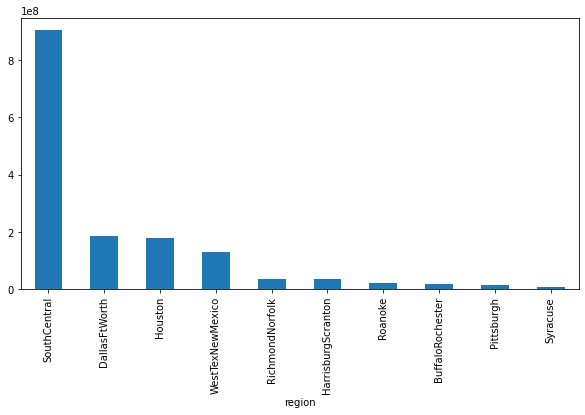

In [43]:
#  Total Volume en regiones para conventional
regiones = ['Syracuse','WestTexNewMexico','DallasFtWorth','BuffaloRochester','SouthCentral','RichmondNorfolk','Houston','Roanoke','Pittsburgh','HarrisburgScranton']
df2[(df2['type'] == 'conventional') & (df2['year'] < 2018) & (df2['region'].isin(regiones))].groupby('region')['Total Volume'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [44]:
regions = ['Pittsburgh', 'Northeast', 'Plains', 'Albany', 'Midsouth', 'GreatLakes', 'NewYork', 'NorthernNewEngland', 'SouthCentral', 'NewOrleansMobile']
std = df2[(df2['type'] == 'organic') & (df2['year'] < 2018)].groupby('region')['AveragePrice'].std().sort_values(ascending=True).head(10)
#media para regiones antes del 2018 para organic en regions
mean = df2[(df2['type'] == 'organic') & (df2['year'] < 2018) & (df2['region'].isin(regions))].groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
#unir los dos dataframes
df4 = pd.concat([mean,std],axis=1)
df4.columns = ['mean','std']
#print con el std mas bajo
df4.sort_values(by='std').head(10)
    

,mean,std
region,,
Pittsburgh,1.484841,0.115507
Northeast,1.875860,0.159422
Plains,1.715096,0.169216
Albany,1.792038,0.179042
Midsouth,1.605541,0.193707
GreatLakes,1.501720,0.196009
NewYork,2.072739,0.198871
NorthernNewEngland,1.705860,0.199631
SouthCentral,1.327707,0.199968


<AxesSubplot:xlabel='region'>

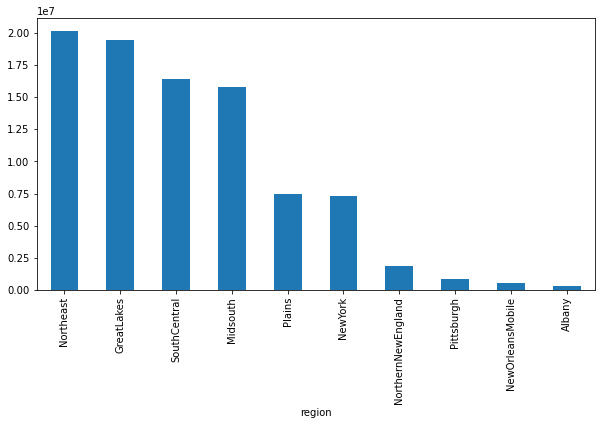

In [45]:
regiones = ['Pittsburgh', 'Northeast', 'Plains', 'Albany', 'Midsouth', 'GreatLakes', 'NewYork', 'NorthernNewEngland', 'SouthCentral', 'NewOrleansMobile']
df2[(df2['type'] == 'organic') & (df2['year'] < 2018) & (df2['region'].isin(regiones))].groupby('region')['Total Volume'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

# df_conventional_w

In [164]:
# df con regiones con std mas bajo
regiones = ['Syracuse','WestTexNewMexico','DallasFtWorth','BuffaloRochester','SouthCentral','RichmondNorfolk','Houston','Roanoke','Pittsburgh','HarrisburgScranton']
df5 = df2[(df2['type'] == 'conventional') & (df2['year'] < 2018) & (df2['region'].isin(regiones))]

In [165]:
df_conventional_w = df5.copy(deep = True)
df_conventional_w.set_index('Date',inplace = True)
df_conventional_w = df_conventional_w.resample('W').mean()
df_conventional_w.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.053,875994.641,443715.671,306490.323,11566.761,114221.886,93939.111,20280.736,2.039,2015
2015-01-11,1.136,887470.249,462044.124,292678.876,14532.509,118214.740,101863.505,16343.704,7.531,2015
2015-01-18,1.111,884244.577,457605.545,302797.659,19570.745,104270.628,93585.808,10680.968,3.852,2015
2015-01-25,1.086,863579.092,506289.930,235650.594,10496.941,111141.627,94802.174,16339.453,0.000,2015
2015-02-01,0.969,1160540.399,593455.278,419224.856,22779.359,125080.906,103741.263,21331.696,7.947,2015


In [166]:
l3 = list(df_conventional_w.columns)
l3.remove('AveragePrice')
df_conventional_w.drop(columns = l3,inplace =True)
df_conventional_w.head()

,AveragePrice
Date,
2015-01-04,1.053
2015-01-11,1.136
2015-01-18,1.111
2015-01-25,1.086
2015-02-01,0.969


c:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

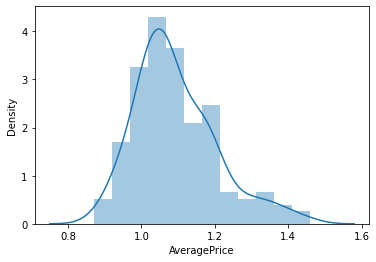

In [167]:
# plot distribution df_conventional_w['AveragePrice'] son sns
sns.distplot(df_conventional_w['AveragePrice'])

AveragePrice    0.866492
dtype: float64

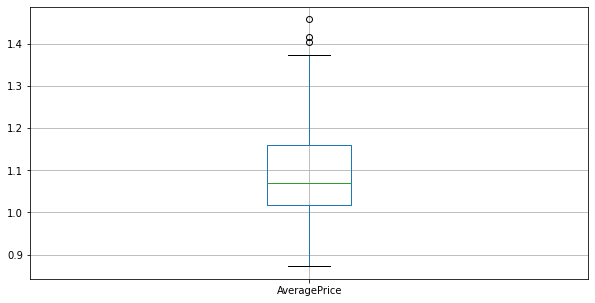

In [168]:
#boxplot para ver la distribucion de los datos
df_conventional_w.boxplot(figsize = (10,5))
# print weaknesses of the data
df_conventional_w.skew()

<Figure size 432x288 with 0 Axes>

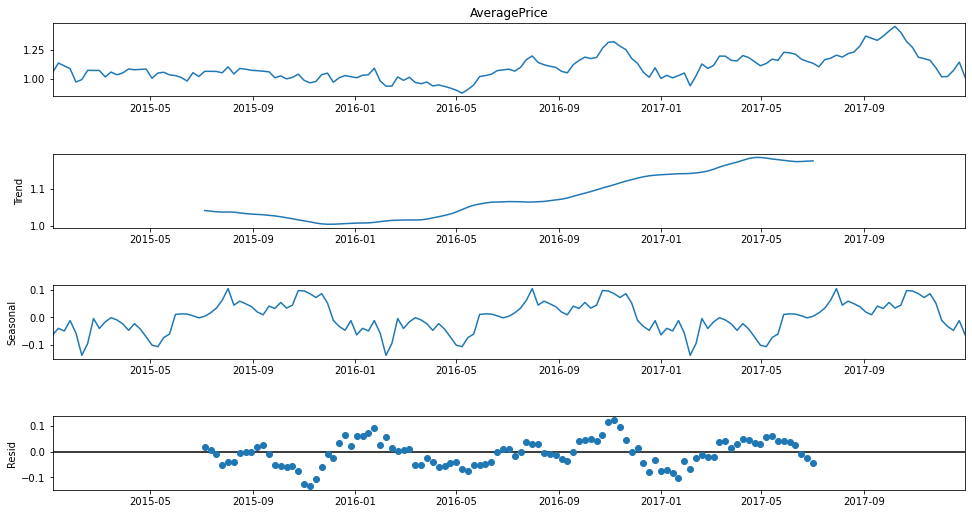

In [169]:

decomposition = seasonal_decompose(df_conventional_w['AveragePrice'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)


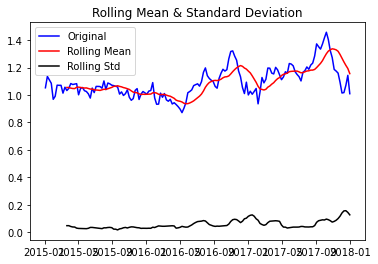

Results of Dickey-Fuller Test:
Test Statistic                  -2.565192
p-value                          0.100407
#Lags Used                       0.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


In [170]:
test_stationarity(df_conventional_w['AveragePrice'])

In [171]:
# no es estacionario, por lo que se debe diferenciar una vez
df_conventional_w['AveragePrice_diff'] = df_conventional_w['AveragePrice'] - df_conventional_w['AveragePrice'].shift(1)
# eliminar el nan
df_conventional_w.dropna(inplace = True)

<Figure size 432x288 with 0 Axes>

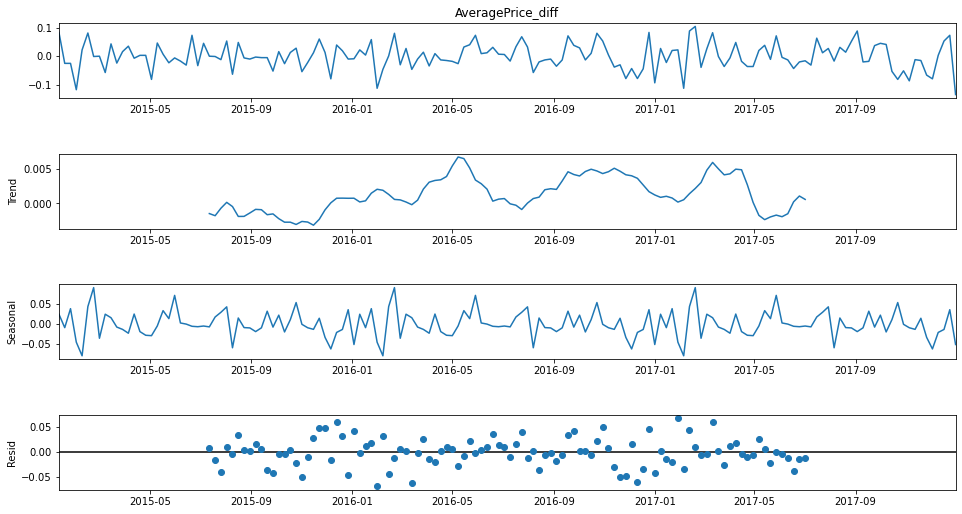

In [172]:
decomposition = seasonal_decompose(df_conventional_w['AveragePrice_diff'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

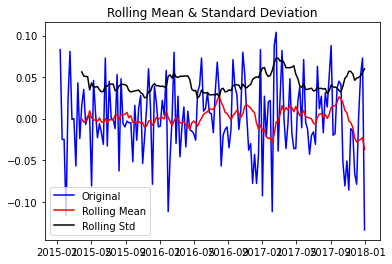

Results of Dickey-Fuller Test:
Test Statistic                -1.212699e+01
p-value                        1.771324e-22
#Lags Used                     0.000000e+00
Number of Observations Used    1.550000e+02
Critical Value (1%)           -3.473259e+00
Critical Value (5%)           -2.880374e+00
Critical Value (10%)          -2.576812e+00
dtype: float64


In [173]:
# test stationarity
test_stationarity(df_conventional_w['AveragePrice_diff'])

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



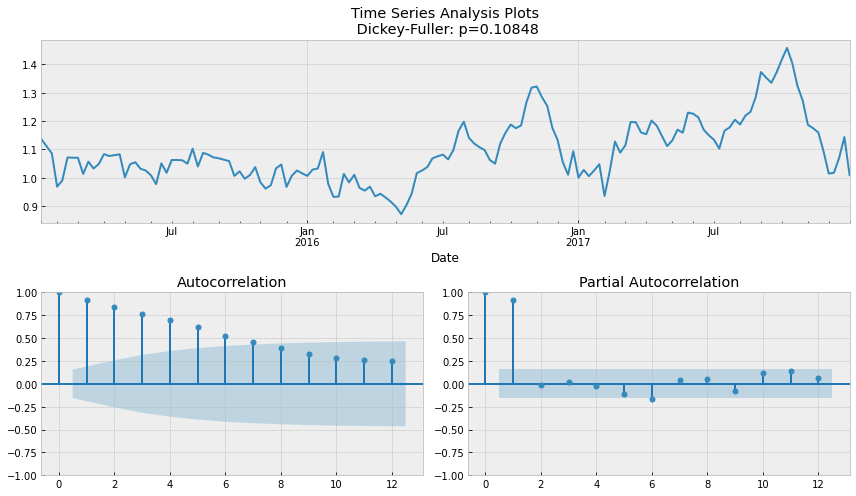

In [174]:
tsplot(df_conventional_w['AveragePrice'], lags=12)

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



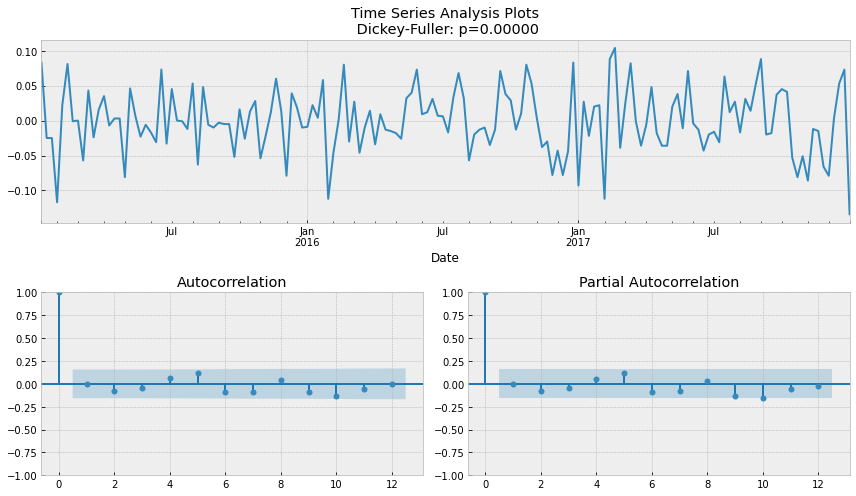

In [175]:
tsplot(df_conventional_w['AveragePrice_diff'], lags=12)

In [176]:
window = 30
train, test =   df_conventional_w['AveragePrice'][:-window], df_conventional_w['AveragePrice'][-window:] 

In [177]:
model = ARIMA(train, order=(1, 1, 2))
model_fit = model.fit()
output = model_fit.forecast(steps=window)

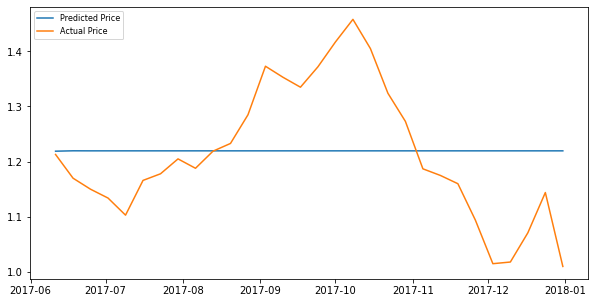

In [178]:
# plot  predictions output vs test
plt.figure(figsize=(10,5))
plt.plot(test.index, output, label='Predicted Price')
plt.plot(test.index, test, label='Actual Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [179]:
error = np.sqrt(mean_squared_error(test, output))
error = error * 100
print('Test RMSE: %.3f' % error)

Test RMSE: 12.069


In [180]:
model = ARIMA(df_conventional_w['AveragePrice'],order = (1,1,2))
model_fit = model.fit()

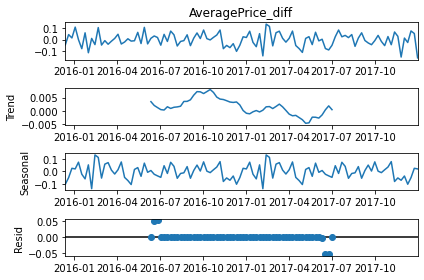

In [181]:
temp = df_conventional_w['AveragePrice_diff'].diff(48)
df_conventional_w_seas = temp.dropna()
dec = sm.tsa.seasonal_decompose(df_conventional_w_seas).plot()
plt.show()

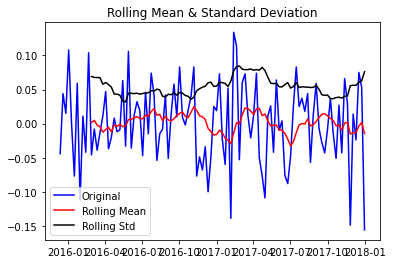

Results of Dickey-Fuller Test:
Test Statistic                -1.099363e+01
p-value                        6.959049e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [182]:
test_stationarity(df_conventional_w_seas)

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



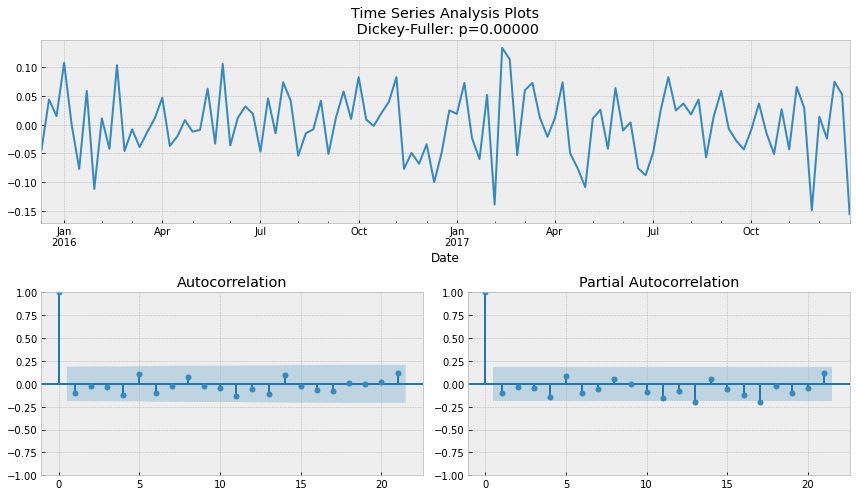

In [183]:
tsplot(df_conventional_w_seas)

Out of Sample Forecasting :


In [184]:
forecast = df_conventional_w.copy(deep=True)

In [185]:
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,AveragePrice_diff,SARIMA_Forecast_Function,SARIMA_Predict_Function
Date,,,,
2015-01-11,1.136,0.083,NaN,NaN
2015-01-18,1.111,-0.025,NaN,NaN
2015-01-25,1.086,-0.025,NaN,NaN
2015-02-01,0.969,-0.117,NaN,NaN
2015-02-08,0.991,0.022,NaN,NaN


In [186]:
d = 1
s = 48

In [187]:
model = sm.tsa.statespace.SARIMAX(df_conventional_w['AveragePrice'], order=(1, d, 2),seasonal_order = (2,d,2,s))
# ajustar el modelo
model_fit = model.fit()

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [188]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  156
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 48)   Log Likelihood                 158.031
Date:                            Tue, 17 Jan 2023   AIC                           -300.062
Time:                                    23:35:15   BIC                           -278.679
Sample:                                01-11-2015   HQIC                          -291.393
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6812      0.970     -0.703      0.482      -2.582       1.219
ma.L1          0.5735      0.990   

In [189]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_conventional_w.index[-1] + DateOffset(weeks=x) for x in range(0,48)]
# New dataframe for storing the future values
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df_conventional_w.columns)

forecast = pd.concat([df_conventional_w,future_datest_df])

In [190]:
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,AveragePrice_diff,SARIMA_Forecast_Function,SARIMA_Predict_Function
2015-01-11,1.136,0.083,NaN,NaN
2015-01-18,1.111,-0.025,NaN,NaN
2015-01-25,1.086,-0.025,NaN,NaN
2015-02-01,0.969,-0.117,NaN,NaN
2015-02-08,0.991,0.022,NaN,NaN


In [191]:
f3 = np.array(model_fit.forecast(steps = 48))
# añadir los valores de la predicción al dataframe para el año futuro 
forecast['SARIMA_Forecast_Function'][-48:] = f3

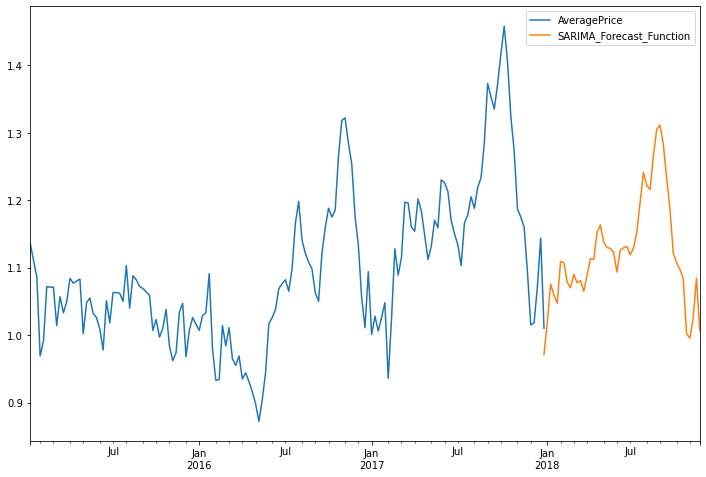

In [192]:
forecast[['AveragePrice','SARIMA_Forecast_Function']].plot(figsize = (12,8));

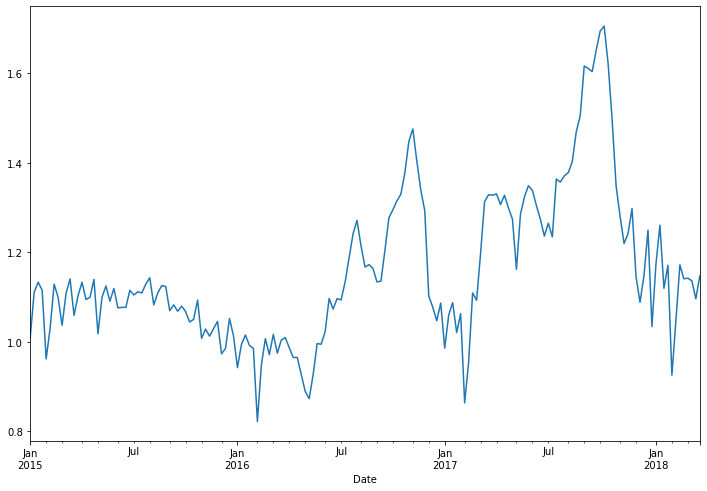

In [194]:
temp_conventional.plot(figsize = (12,8));

In [195]:
f4 = np.array(model_fit.predict(start = 156, end = 203))
# añadir los valores de la predicción al dataframe para el año futuro
forecast['SARIMA_Predict_Function'][-48:] = f4

In [196]:
forecast['SARIMA_Predict_Function'][-48:]

2017-12-31    0.971381
2018-01-07    1.020171
2018-01-14    1.075708
2018-01-21    1.059084
2018-01-28    1.047317
2018-02-04    1.109391
2018-02-11    1.107123
2018-02-18    1.078570
2018-02-25    1.069971
2018-03-04    1.089961
2018-03-11    1.077620
2018-03-18    1.080702
2018-03-25    1.064710
2018-04-01    1.088646
2018-04-08    1.113114
2018-04-15    1.111954
2018-04-22    1.152193
2018-04-29    1.163273
2018-05-06    1.137898
2018-05-13    1.129645
2018-05-20    1.128573
2018-05-27    1.122522
2018-06-03    1.093415
2018-06-10    1.125790
2018-06-17    1.129375
2018-06-24    1.131377
2018-07-01    1.118861
2018-07-08    1.128744
2018-07-15    1.152658
2018-07-22    1.196575
2018-07-29    1.240972
2018-08-05    1.221757
2018-08-12    1.215727
2018-08-19    1.265755
2018-08-26    1.304705
2018-09-02    1.311175
2018-09-09    1.282400
2018-09-16    1.232999
2018-09-23    1.187185
2018-09-30    1.121264
2018-10-07    1.107127
2018-10-14    1.097307
2018-10-21    1.084465
2018-10-28 

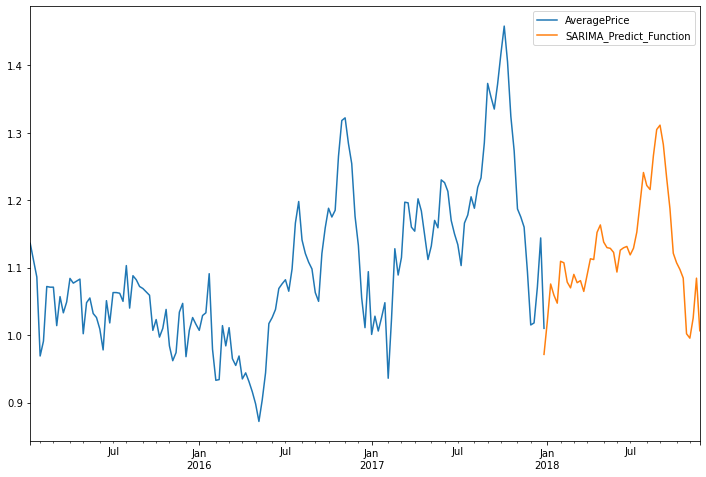

In [197]:
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));

# df_organic_w

In [198]:
regiones = ['Pittsburgh', 'Northeast', 'Plains', 'Albany', 'Midsouth', 'GreatLakes', 'NewYork', 'NorthernNewEngland', 'SouthCentral', 'NewOrleansMobile']
df6 = df2[(df2['type'] == 'organic') & (df2['year'] < 2018) & (df2['region'].isin(regiones))]
df_organic_w = df6.copy(deep = True)
df_organic_w.set_index('Date',inplace = True)
df_organic_w = df_organic_w.resample('W').mean()
l3 = list(df_organic_w.columns)
l3.remove('AveragePrice')
df_organic_w.drop(columns = l3,inplace =True)
df_organic_w.head()    

,AveragePrice
Date,
2015-01-04,1.679
2015-01-11,1.708
2015-01-18,1.681
2015-01-25,1.733
2015-02-01,1.660


AveragePrice   -0.273664
dtype: float64

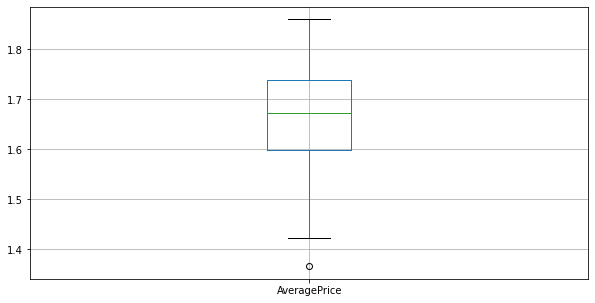

In [199]:
df_organic_w.boxplot(figsize = (10,5))
# print weaknesses of the data
df_organic_w.skew()

c:\Users\Equipo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

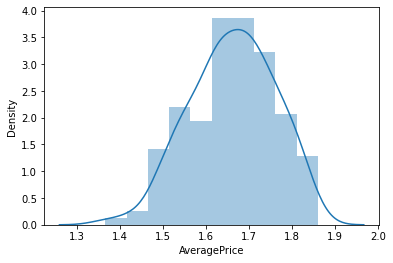

In [200]:
# plot 
sns.distplot(df_organic_w['AveragePrice'])


<Figure size 432x288 with 0 Axes>

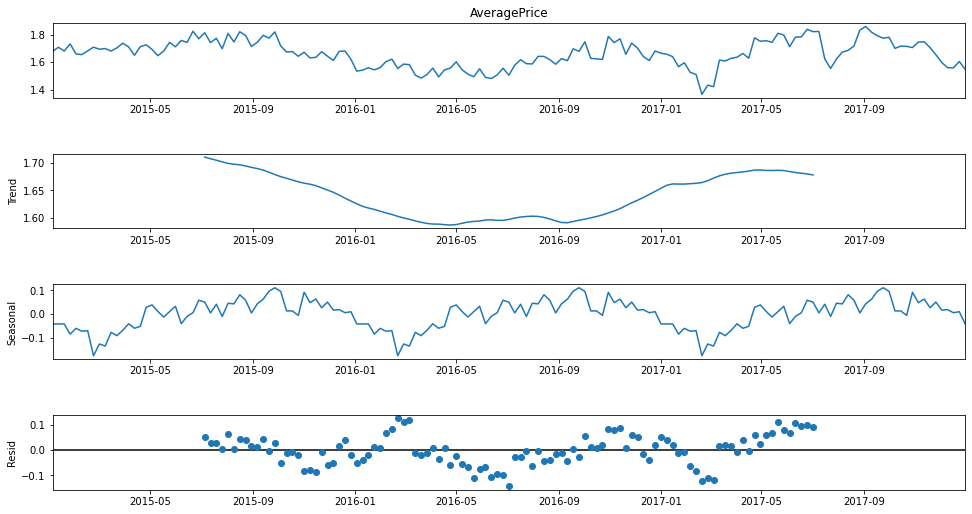

In [201]:
decomposition = seasonal_decompose(df_organic_w['AveragePrice'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

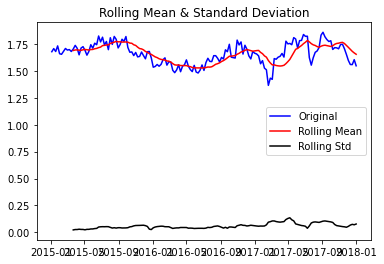

Results of Dickey-Fuller Test:
Test Statistic                  -2.366296
p-value                          0.151476
#Lags Used                       5.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [202]:
test_stationarity(df_organic_w['AveragePrice'])

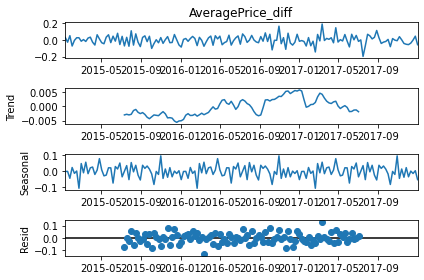

In [203]:
df_organic_w['AveragePrice_diff'] = df_organic_w['AveragePrice'] - df_organic_w['AveragePrice'].shift(1)
df_organic_w = df_organic_w.dropna()
dec = sm.tsa.seasonal_decompose(df_organic_w['AveragePrice_diff']).plot()
plt.show()

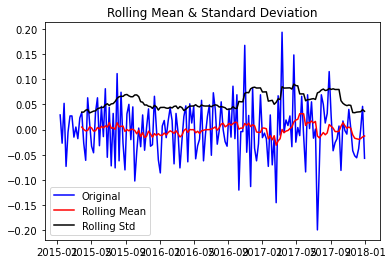

Results of Dickey-Fuller Test:
Test Statistic                -6.829708e+00
p-value                        1.907504e-09
#Lags Used                     4.000000e+00
Number of Observations Used    1.510000e+02
Critical Value (1%)           -3.474416e+00
Critical Value (5%)           -2.880878e+00
Critical Value (10%)          -2.577081e+00
dtype: float64


In [204]:
test_stationarity(df_organic_w['AveragePrice_diff'])

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



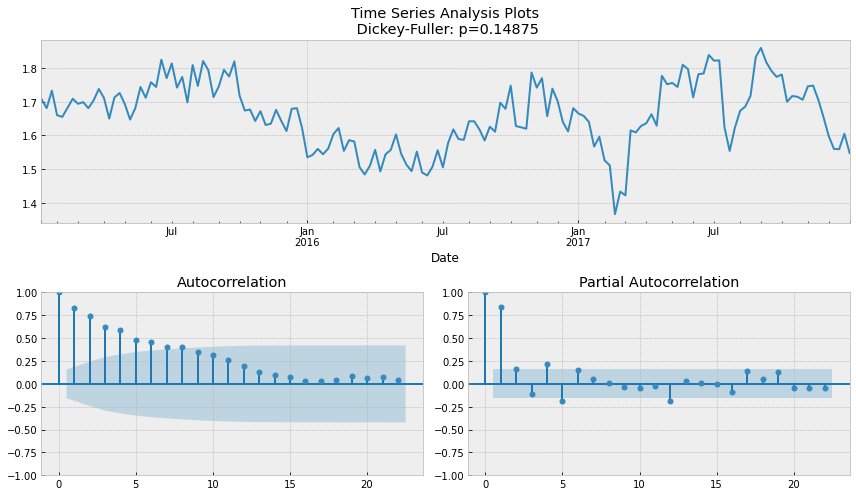

In [205]:
tsplot(df_organic_w['AveragePrice'])

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



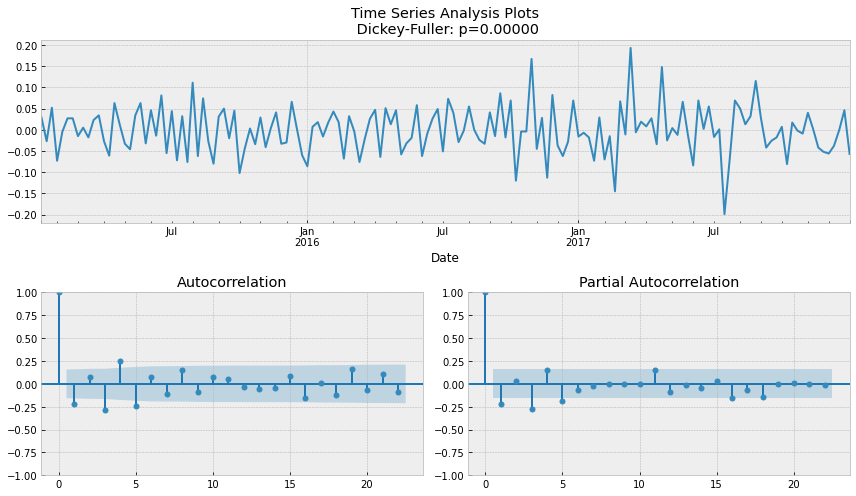

In [206]:
tsplot(df_organic_w['AveragePrice_diff'])

In [207]:
model = ARIMA(df_organic_w['AveragePrice'], order=(1, d, 2))
            # ajustar el modelo
model_fit = model.fit()

SARIMA

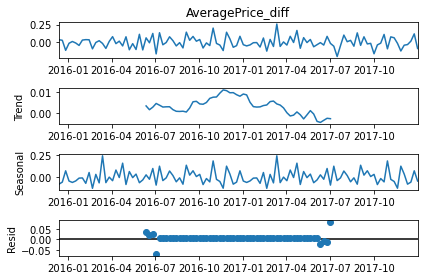

In [208]:
df_organic_w_diff_seas = df_organic_w['AveragePrice_diff'].diff(48)
df_organic_w_diff_seas = df_organic_w_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(df_organic_w_diff_seas).plot()
plt.show()

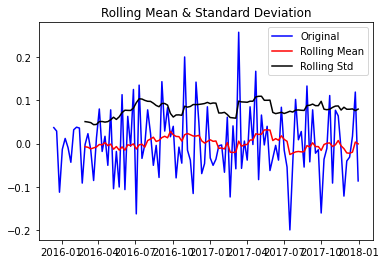

Results of Dickey-Fuller Test:
Test Statistic                  -5.563684
p-value                          0.000002
#Lags Used                       3.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [209]:
test_stationarity(df_organic_w_diff_seas)

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



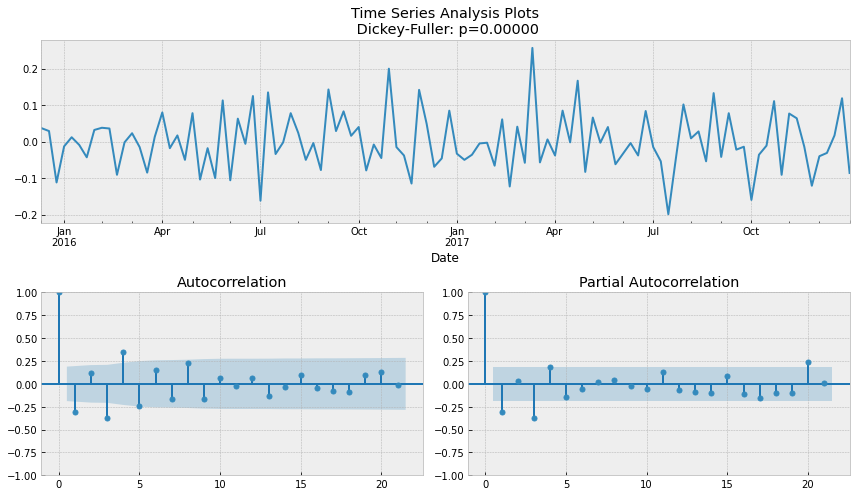

In [210]:
tsplot(df_organic_w_diff_seas)

In [211]:
window = 30 
train, test     = df_organic_w['AveragePrice'][:-window], df_organic_w['AveragePrice'][-window:]

In [212]:
model = sm.tsa.statespace.SARIMAX(train,    order=(1, d, 2),    seasonal_order=(2, d, 2, s))
model_fit  = model.fit()
print(model_fit.summary())

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  126
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 48)   Log Likelihood                  99.411
Date:                            Tue, 17 Jan 2023   AIC                           -182.822
Time:                                    23:35:53   BIC                           -164.072
Sample:                                01-11-2015   HQIC                          -175.322
                                     - 06-04-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9268      0.118     -7.850      0.000      -1.158      -0.695
ma.L1          0.6052      0.205   

In [213]:
pred = model_fit.predict(start = 126, end = 155, dynamic = True)

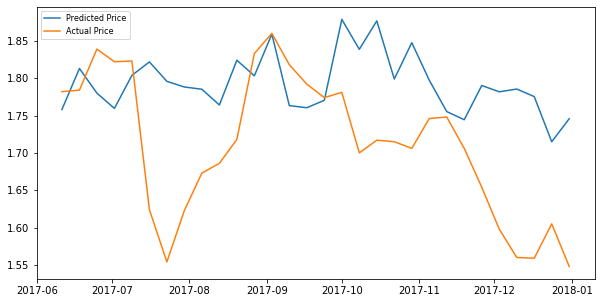

In [214]:
# print pred vs test
plt.figure(figsize=(10,5))
plt.plot(test.index, pred, label='Predicted Price')
plt.plot(test.index, test, label='Actual Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [215]:
# RMSE
rmse = np.sqrt(mean_squared_error(test, pred))
rmse = rmse * 100
print('RMSE: {}'.format(round(rmse, 2)))

RMSE: 12.32


In [216]:
model = sm.tsa.statespace.SARIMAX(df_organic_w['AveragePrice'],    order=(1, d, 2),    seasonal_order=(2, d, 2, s))
model_fit  = model.fit()

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\Equipo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [217]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  156
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 48)   Log Likelihood                 134.322
Date:                            Tue, 17 Jan 2023   AIC                           -252.644
Time:                                    23:36:47   BIC                           -231.261
Sample:                                01-11-2015   HQIC                          -243.976
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8932      0.119     -7.511      0.000      -1.126      -0.660
ma.L1          0.7632      0.171   

In [218]:
pred = model_fit.predict(start = 156, end = 203, dynamic = True)
pred_ci = model_fit.get_forecast(steps = 48).conf_int()

In [219]:
future_dates = [df_organic_w.index[-1] + DateOffset(weeks=x) for x in range(0,48)]

future_datest_df = pd.DataFrame(index=future_dates[1:],columns=df_organic_w.columns)
forecast = pd.concat([df_organic_w,future_datest_df])
forecast['SARIMA_Forecast_Function'] = np.NaN
forecast['SARIMA_Predict_Function'] = np.NaN
forecast.head()

,AveragePrice,AveragePrice_diff,SARIMA_Forecast_Function,SARIMA_Predict_Function
2015-01-11,1.708,0.029,NaN,NaN
2015-01-18,1.681,-0.027,NaN,NaN
2015-01-25,1.733,0.052,NaN,NaN
2015-02-01,1.660,-0.073,NaN,NaN
2015-02-08,1.655,-0.005,NaN,NaN


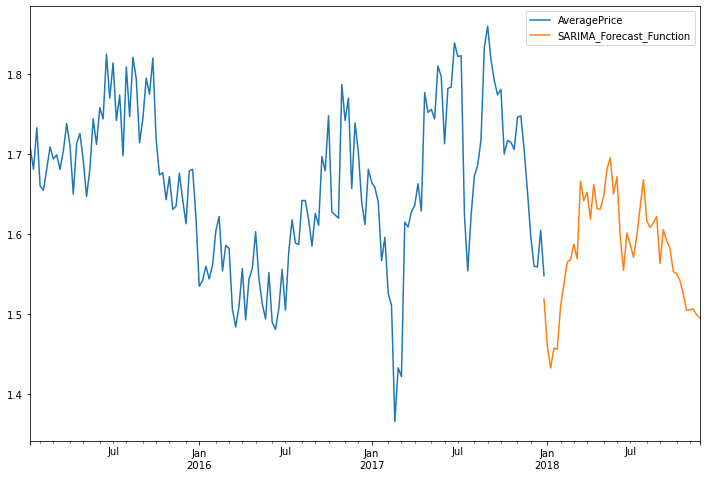

In [220]:
f3 = np.array(model_fit.forecast(steps = 48))
# añadir los valores de la predicción al dataframe para el año futuro
forecast['SARIMA_Forecast_Function'][-48:] = f3
forecast[['AveragePrice','SARIMA_Forecast_Function']].plot(figsize = (12,8));

In [224]:
forecast['SARIMA_Predict_Function'][-48:]

2017-12-31    1.519052
2018-01-07    1.460019
2018-01-14    1.432685
2018-01-21    1.457812
2018-01-28    1.456031
2018-02-04    1.510021
2018-02-11    1.537194
2018-02-18    1.565110
2018-02-25    1.567965
2018-03-04    1.587494
2018-03-11    1.569101
2018-03-18    1.666320
2018-03-25    1.641781
2018-04-01    1.651778
2018-04-08    1.618722
2018-04-15    1.662242
2018-04-22    1.631693
2018-04-29    1.631377
2018-05-06    1.647460
2018-05-13    1.681210
2018-05-20    1.695591
2018-05-27    1.650442
2018-06-03    1.671789
2018-06-10    1.596600
2018-06-17    1.554602
2018-06-24    1.601537
2018-07-01    1.587311
2018-07-08    1.571092
2018-07-15    1.597789
2018-07-22    1.633953
2018-07-29    1.667979
2018-08-05    1.616728
2018-08-12    1.608144
2018-08-19    1.614277
2018-08-26    1.622011
2018-09-02    1.563357
2018-09-09    1.605774
2018-09-16    1.591988
2018-09-23    1.582434
2018-09-30    1.553179
2018-10-07    1.550959
2018-10-14    1.542280
2018-10-21    1.525654
2018-10-28 

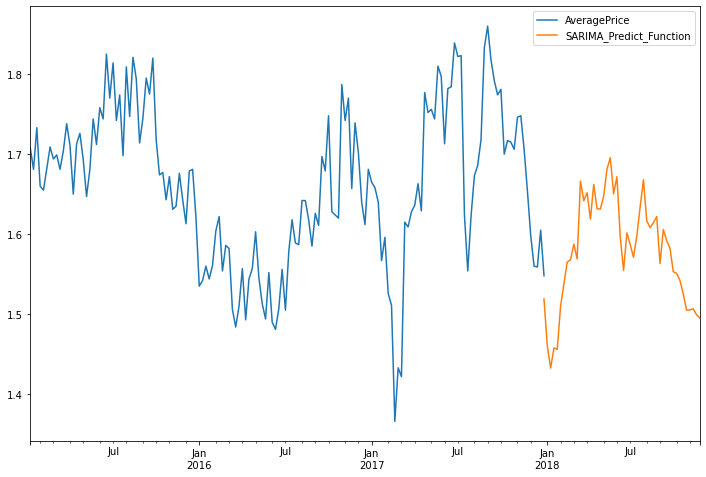

In [221]:
f4 = np.array(model_fit.predict(start = 156, end = 203))
# añadir los valores de la predicción al dataframe para el año futuro
forecast['SARIMA_Predict_Function'][-48:] = f4
forecast[['AveragePrice','SARIMA_Predict_Function']].plot(figsize = (12,8));

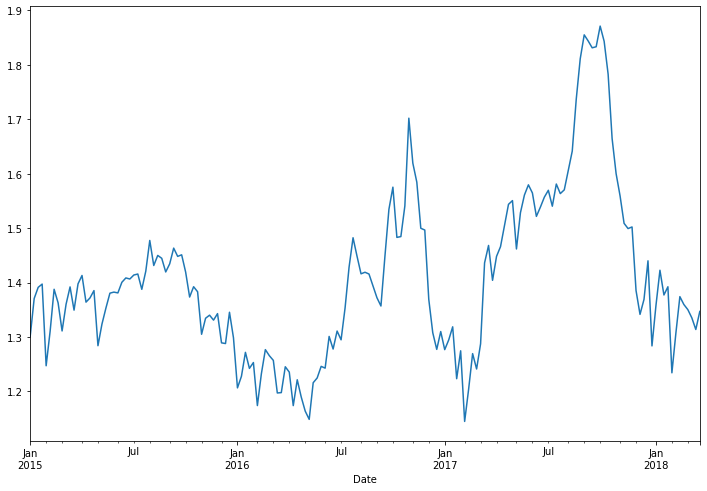

In [222]:
temp_organic['AveragePrice'].plot(figsize = (12,8));